# Finals Assignment Output

> Submitted by Jude M. Ando of BSCS 1 for Discrete Mathematics 2

Read about (Susanna Epp pp. 704):

Kruskal's Algorithm
Prim's Algorithm
Djitraka's Shortest Path Algorithm
Given the following graph, implement the algorithm in Python.

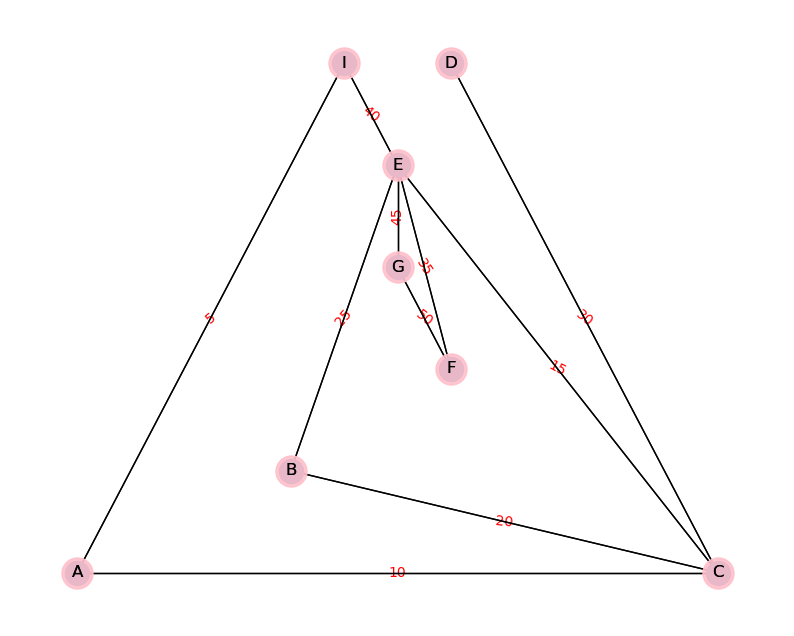

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

## Kruskal's Algorithm

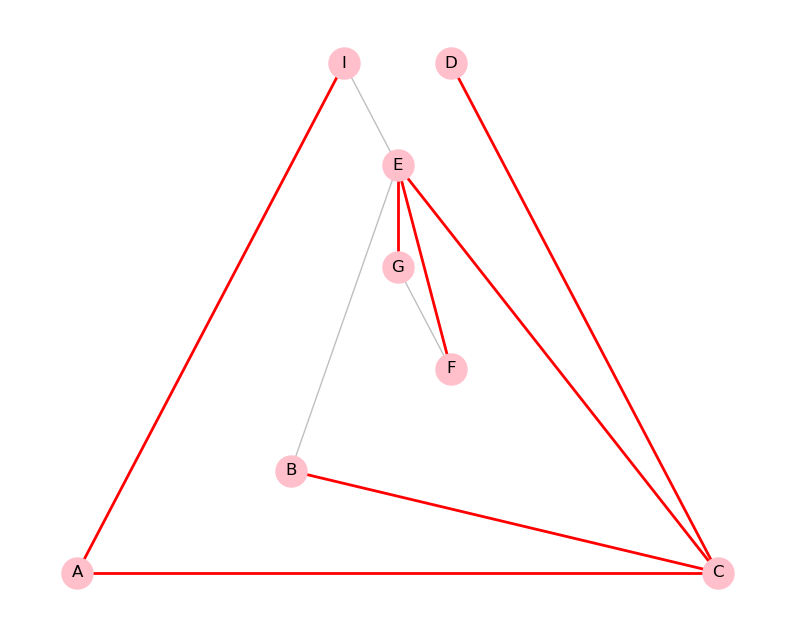

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def kruskal_mst(graph):
    edges = []
    for u, v, w in graph.edges(data=True):
        edges.append((u, v, w['weight']))
    edges.sort(key=lambda x: x[2])

    mst_edges = []
    parent = {node: node for node in graph.nodes()}
    rank = {node: 0 for node in graph.nodes()}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            if rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            elif rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            else:
                parent[root_v] = root_u
                rank[root_u] += 1
            return True
        return False

    for u, v, weight in edges:
        if union(u, v):
            mst_edges.append((u, v))

    return mst_edges

def draw_graph_with_mst(graph, mst_edges):
    pos = nx.planar_layout(graph)  # Seed for reproducible layout

    plt.figure(figsize=(10, 8))

    nx.draw_networkx_edges(graph, pos, edgelist=mst_edges, edge_color='red', width=2)

    non_mst_edges = [edge for edge in graph.edges() if edge not in mst_edges]
    nx.draw_networkx_edges(graph, pos, edgelist=non_mst_edges, edge_color='gray', width=1, alpha=0.5)

    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='pink')
    nx.draw_networkx_labels(graph, pos)

    plt.axis('off')
    plt.show()

G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C", 10),("A","I", 5),("C","B", 20),("C","E", 15),("C","D", 30),("B","E", 25),("I","E", 40),("E","F", 35),("F","G", 50),("G","E", 45)]
G.add_weighted_edges_from(edgelist)

mst = kruskal_mst(G)
draw_graph_with_mst(G, mst)

## Prim's Algorithm

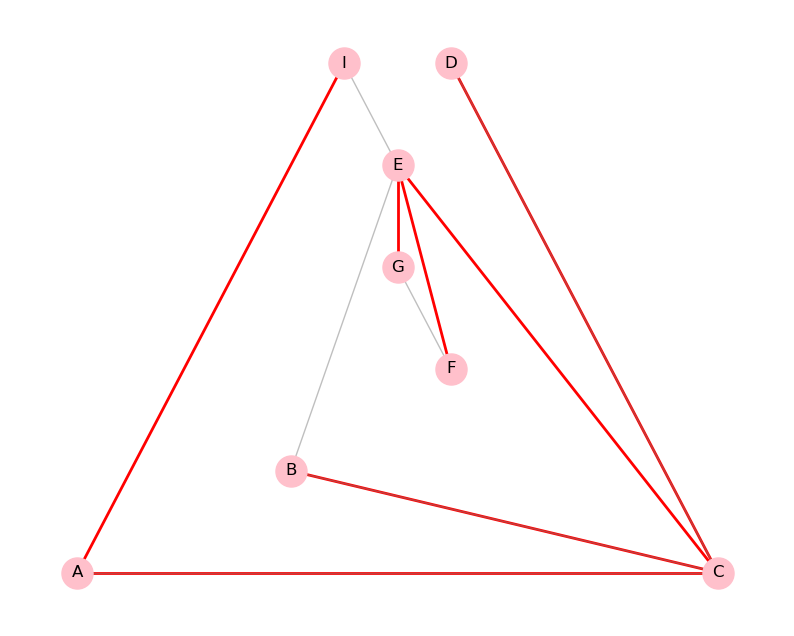

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

def prim_mst(graph):
    mst_edges = nx.minimum_spanning_edges(graph, algorithm='prim', data=False)
    return list(mst_edges)

def draw_graph_with_mst(graph, mst_edges):
    pos = nx.planar_layout(graph)  # Seed for reproducible layout

    plt.figure(figsize=(10, 8))

    nx.draw_networkx_edges(graph, pos, edgelist=mst_edges, edge_color='red', width=2)

    non_mst_edges = [edge for edge in graph.edges() if edge not in mst_edges]
    nx.draw_networkx_edges(graph, pos, edgelist=non_mst_edges, edge_color='gray', width=1, alpha=0.5)

    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='pink')
    nx.draw_networkx_labels(graph, pos)

    plt.axis('off')
    plt.show()

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

mst_edges = prim_mst(G)

draw_graph_with_mst(G, mst_edges)

## Dijkstra's Algorithm

C:\Users\andoj\AppData\Local\Temp\ipykernel_6292\2907655648.py:42: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos, edgelist=shortest_path_edges, edge_color='red', width=2)


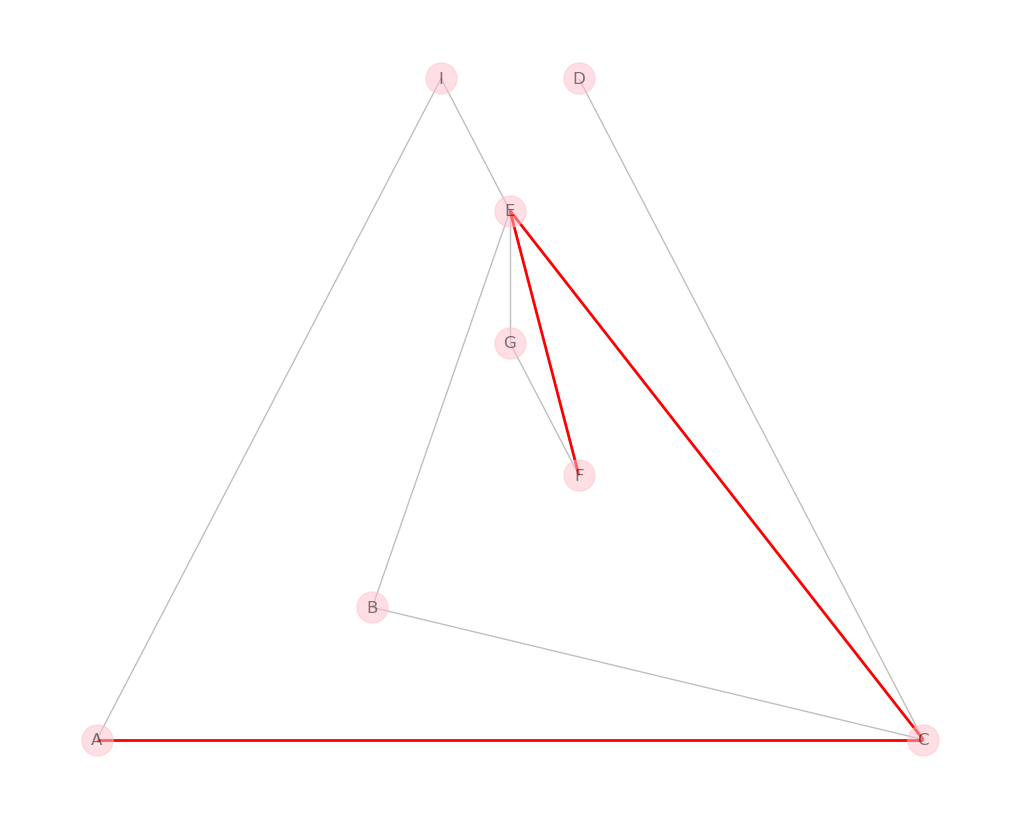

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def dijkstra_shortest_paths(graph, source):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[source] = 0

    pq = [(0, source)]
    heapq.heapify(pq)

    predecessors = {}

    while pq:
        dist_to_u, u = heapq.heappop(pq)

        if dist_to_u > distances[u]:
            continue

        for v, w in graph[u].items():
            dist_to_v = dist_to_u + w['weight']
            if dist_to_v < distances[v]:
                distances[v] = dist_to_v
                heapq.heappush(pq, (dist_to_v, v))
                predecessors[v] = u

    return distances, predecessors

def highlight_shortest_path(graph, source, target, predecessors):
    path = [target]
    while path[-1] != source:
        path.append(predecessors[path[-1]])
    shortest_path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return shortest_path_edges

def draw_graph_with_shortest_path(graph, shortest_path_edges):
    plt.figure(figsize=(10, 8))

    pos = nx.planar_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='pink', edge_color='gray', width=1, alpha=0.5)

    nx.draw_networkx_edges(graph, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

    plt.axis('off')
    plt.show()

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

distances, predecessors = dijkstra_shortest_paths(G, 'A')

shortest_path_edges = highlight_shortest_path(G, 'A', 'F', predecessors)

draw_graph_with_shortest_path(G, shortest_path_edges)